# Tabular Data and Dataframes

There are two most useful libraries in Python that can help you deal with tabular data:

- Pandas allows you to manipulate so-called Dataframes, which are analogous to relational tables. You can have named columns, and perform different operations on row, columns and dataframes in general.
- Numpy is a library for working with tensors, i.e. multi-dimensional arrays. Array has values of the same underlying type, and it is simpler than dataframe, but it offers more mathematical operations, and creates less overhead.

There are also a couple of other libraries you should know about:

- Matplotlib is a library used for data visualization and plotting graphs
- SciPy is a library with some additional scientific functions. We have already come across this library when talking about probability and statistics

Here is a piece of code that you would typically use to import those libraries in the beginning of your Python program:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats  # .... you need to specify exact sub-packages that you need

Consider an example: we want to analyze sales of our ice-cream spot. Let's generate a series of sales numbers (number of items sold each day) for some time period:

Length of index is 91


<Axes: >

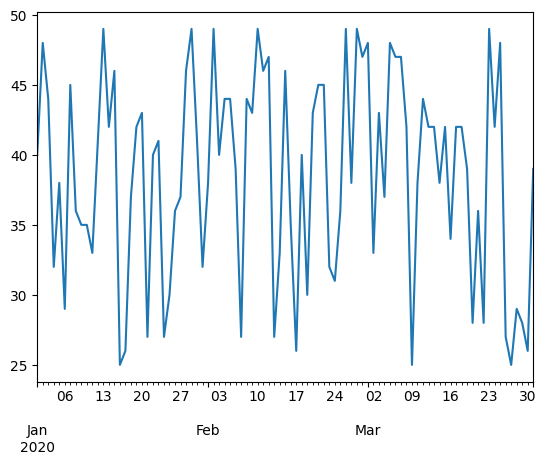

In [2]:
start_date = "Jan 1, 2020"
end_date = "Mar 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot()

Now suppose that each week we are organizing a party for friends, and we take additional 10 packs of ice-cream for a party. We can create another series, indexed by week, to demonstrate that:

In [3]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))

When we add two series together, we get total number:

<Axes: >

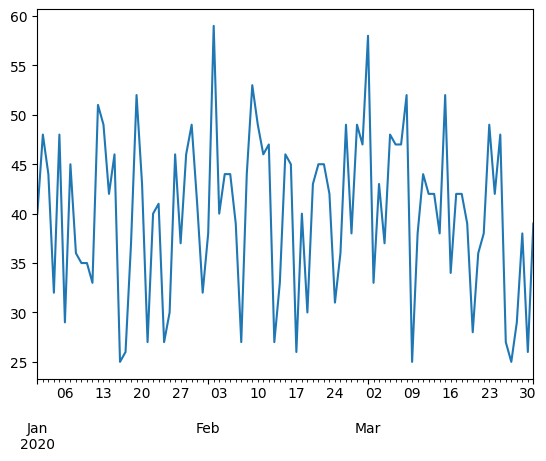

In [4]:
total_items = items_sold.add(additional_items,fill_value=0)
total_items.plot()

With time series, we can also resample the series with different time intervals. For example, suppose we want to compute mean sales volume monthly. We can use the following code:

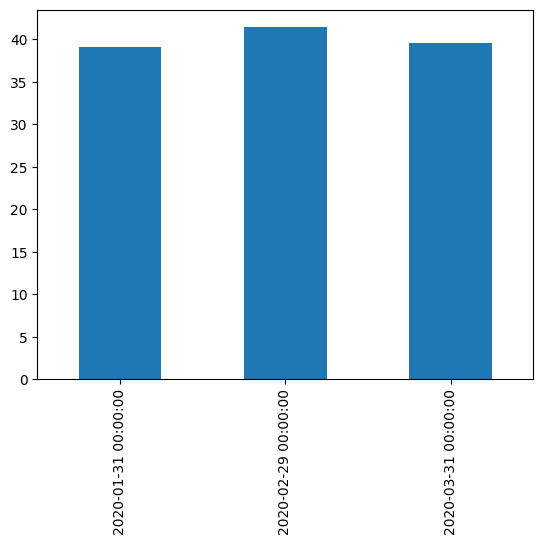

In [5]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar')

# Data Frame 
A DataFrame is essentially a collection of series with the same index. We can combine several series together into a DataFrame:

In [6]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","play","games","and","will","not","change"],index=range(0,9))
df = pd.DataFrame([a,b])

This will create a horizontal table like this: | | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | | --- | --- | ---- | --- | --- | ------ | --- | ------ | ---- | ---- | | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | | 1 | I | like | to | use | Python | and | Pandas | very | much |

We can also use Series as columns, and specify column names using dictionary:

In [7]:
df = pd.DataFrame({ 'A' : a, 'B' : b })

Note that we can also get this table layout by transposing the previous table, eg. by writing

In [9]:
df = pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

In [10]:
df['DivA'] = df['A']-df['A'].mean()